# Homework 08
## Brown University
## DATA 1010
## Fall 2020

In [1]:
#using Pkg
#Pkg.activate(".")
#Pkg.add(["Plots", "Distributions", "JSON", "JSONTables", "DataFrames", "StatsBase", "TextAnalysis"])

In [2]:
using Plots, Distributions
default(fontfamily = "Palatino")

## Problem 1

Write a summary, in your own words, of the statistical learning theory framework we're using in this course. Here are some points you should cover:

- What kinds of problems is statistical learning intended to solve?
- What are some different names people use for the input variables?
- What are some different names people use for the output variables?
- What's the difference between regression and classification?
- What's a loss functional?
- What is the regression function? What's the difference between the regression function and terms of the form "*adjective* regression" (like linear regression, Nadaraya-Watson regression, etc.)? 
- Complete the analogy: the regression function is to a regression problem as the ______ is to a classification problem?
- What is the empirical risk minimizer?
- Is it correct that generalization error is defined in terms of the behavior of the model on a withheld subset of the training data? (Hint: this is *incorrect*, but in a subtle way; explain this detail.)
- What is inductive bias, and what are some ways to introduce it?
- What does the no-free-lunch theorem tell us about inductive bias?

Use examples, where appropriate, to illustrate your points. When you do choose examples, always use ones which are different from the ones used in the first section of the Data Gymnasia Machine Learning course.

Note that you should *not* answer the above questions bullet by bullet. Weave your answers into a coherent narrative.

## Problem 2

Consider a fire alarm which uses a heat sensor as a trigger. Let $t$ be the age of the alarm, in months. When the sensor detects heat, the measured voltage from its diodes follows the normal distribution $\mathcal{N}(1, \frac{t}{360})$. When it does not, the voltage has the distribution $\mathcal{N}(0, \frac{t}{360})$.  This alarm will go off whenever it detects a voltage above a given threshold $V$. For simplicity, you can assume that this device is only used once a month instead of continuously.

(a) Find the probability that the alarm will err in the first twelve months (failing to sound when it should, or sounding when it shouldn't), assuming a threshold of $V = 0.5$.

Hint: the answer is so incredibly small that you might need to use bignums, depending on how you got about it.

(b) A test is scheduled five years into the device's lifecycle. Draw the ROC curve at the five-year mark (bearing in mind that the value $V$ can be varied).

(c) The manufacturers of this device has decided that when a mistake occurs, a false alarm is more acceptable than a false negative. Moreover, they wish to control the rates of false negatives to false positives at 10 to 1, to avoid the boy-who-cried-wolf effect. For $t = 5$ years, can you give a value of $V$ that satisfies this condition? Will the best $V$ change as a function of device age?

(d) Draw an assortment of ROC curves with different $t$'s, using appropriate spacing between the times plotted. When will be the first time that the AUROC is below 0.81? 

## Problem 3

Please show all your answers as scatter plots, labeling the classes by color. For simplicity, the notions of success and failure described in each part can be measured by misclassification error.

(a) Construct one example of a binary classification problem defined on $[0, 1] \times [0, 1]$ with around $100$ data points where QDA would perform very nicely, but a Naive Bayes version of QDA would fail.

(b) Construct one example of a binary classification problem defined on $[0, 1] \times [0, 1]$ with around $100$ data points where some Naive Bayes model (one you should specify) would perform very nicely, but QDA would fail.

(c) Is it possible to construct an example with the same conditions as above in which QDA would be successful but LDA will not? What about the other way around?

## Problem 4

In this problem we'll learn about *empirical* ROC curves. This is an important topic because in practice you won't know the data-generating probability measure and therefore will not be able to compute the theoretical ROC curve. But you still need to  be able to establish the approximate spectrum of options for the tradeoff between detection rate and false alarm rate.

The code below, which comes from the pre-class notebook for Day 19, shows an example using some simulated data:

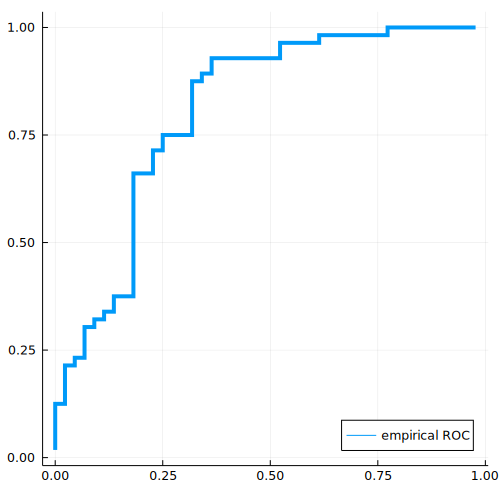

In [3]:
n = 100
neg = []
pos = []
for i = 1:n
    if rand(Bernoulli(0.5))
        push!(neg, rand(Normal(0, 1)))
    else
        push!(pos, rand(Normal(1, 1)))
    end
end
obs = sort([pos; neg])
critical_xs = 0.5(obs[1:end-1] + obs[2:end])
DR(neg, pos, x) = count(pos .> x) / length(pos)
FAR(neg, pos, x) = count(neg .> x) / length(neg)
plot([(FAR(neg, pos, x), DR(neg, pos, x)) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

(a) Explain what this code is doing. I recommend watching the [pre-class video](https://youtu.be/NbHE_hokUTE) for details. 

(b) Sometimes the approach illustrated above in inadequate. For example, consider the following data: 

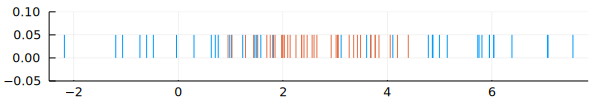

In [4]:
neg = [[rand(Normal(0, 1)) for _ in 1:20]; [rand(Normal(5, 1)) for _ in 1:20]]
pos = [rand(Normal(2.5, 1)) for _ in 1:40]
sticks([(x, 0.05) for x in neg], ylims = (-0.05, 0.1), size = (600, 100), legend = false)
sticks!([(x, 0.05) for x in pos])

These data are quite well separated spatially, and the ROC curve should therefore get pretty well into the upper left corner. However, if you apply the approach in (a), that is not what you'll find: 

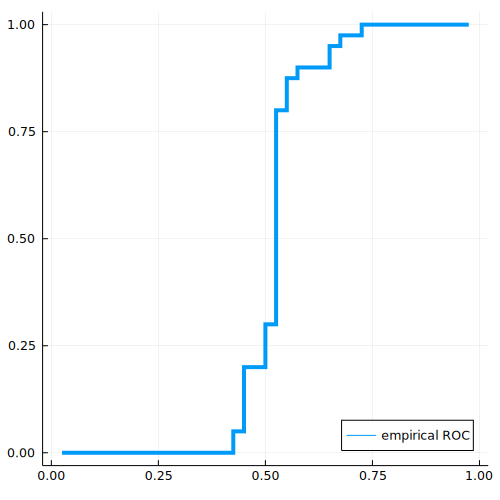

In [5]:
obs = sort([pos; neg])
critical_xs = 0.5(obs[1:end-1] + obs[2:end])
plot([(FAR(neg, pos, x), DR(neg, pos, x)) for x in critical_xs], linewidth = 4, 
      legend = :bottomright, ratio = 1, size = (500, 500), label = "empirical ROC")

Describe a strategy for handling this kind of situation better.

## Problem 5

Explain why the ROC curves should really be concave. 

*Hint: given any two points on the ROC curve, the points on the line segment connecting them are all accessible, for a very similar reason to what we discussed in class about how the ROC curve should lie above the diagonal of the square.*

## Problem 6

In this problem, we are going to use the Naive Bayes method to generate some predictions on text data. Here the [dataset](https://nijianmo.github.io/amazon/index.html#subsets) we use comes from reviews on [Amazon.com](www.amazon.com) for their products in Toys and Games.

For your reference, we will provide some code below for you to pull the data from a json file:

In [6]:
using JSON, JSONTables
using DataFrames

┌ Info: Precompiling JSONTables [b9914132-a727-11e9-1322-f18e41205b0b]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278


The size of this dataset exceeds Github's limitations, please download it from either the link provided two cells above, or using this [Google Drive link](https://drive.google.com/file/d/1XrAeVwuW5gWMx1oDgNAFaMDxbdbDSEl9/view?usp=sharing). Be sure to use your Brown email address to access this file.

In [7]:
f = open("Toys_and_Games_5.json")
df = DataFrame(reviewText = [], overall = [])
while (! eof(f))
    line = readline(f)
    if line != ""
        push!(df, JSON.parse(line))
    end
end

In [8]:
df[1:5, :]

,reviewText
,Any
1,I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.
2,Love the magnet easel... great for moving to different areas... Wish it had some sort of non skid pad on bottom though...
3,"Both sides are magnetic. A real plus when you're entertaining more than one child. The four-year old can find the letters for the words, while the two-year old can find the pictures the words spell. (I bought letters and magnetic pictures to go with this board). Both grandkids liked it a lot, which means I like it a lot as well. Have not even introduced markers, as this will be used strictly as a magnetic board."
4,"Bought one a few years ago for my daughter and she loves it, still using it today. For the holidays we bought one for our niece and she loved it too."
5,I have a stainless steel refrigerator therefore there are not much space for my son to play with his magnet. Brought this for him to put his magnet on. He enjoys sticking his magnet on it. Great to have so he can play with his alphabet magnets.


One of the columns might be omitted in the above results. The original dataframe contains more columns, but the only ones we will deal with in this problem is `reviewText` and `overall`. In Amazon's system, `overall` is the 1-5 star score provided by the reviewer to accompany their review. We will train our Naive Bayes model on most of the data, while using the remaining data as a test set to see if we can predict the `overall` score using only the text.

In [9]:
names(df)

2-element Array{String,1}:
 "reviewText"
 "overall"

As well as a preprocessing function:

In [10]:
using TextAnalysis, Plots, StatsBase

"""
Given a string s, return a list comprised of words that make up this string.
Some alterations, like removal of plural and tense, may be applied.
"""
function preprocess(s)
    message = remove_corrupt_utf8(s)
    patterns = [:html => (r"<[^<>]+>", " "),
                :number => (r"[0-9]+", "number"),
                :url => (r"(http|https)://[^\s]*", "httpaddr"),
                :email => (r"[^\s]+@[^\s]+", "emailaddr"),
                :dollar => (r"[$]+", "dollar")]

    for (symbol, (regex, replacement)) in patterns
        s = replace(s, regex => replacement)
    end
    splitting_chars = [' ', '@', '$', '/', '#', '.', '-', ':',
                       '&', '*', '+',
                       '=', '[', ']', '?', '!', '(', ')', '{',
                       '}', ',', '\'', '"',
                       '>', '_', '<', ';', '%', '\f']
    raw_words = split(s, splitting_chars)

    cleaned_words = [word for word in raw_words if length(word) > 1]
    if length(cleaned_words) == 0
        return ""
    end
    alpha_numeric_pattern = r"[^a-zA-Z0-9]"
    cleaned_words = [replace(word, alpha_numeric_pattern => "") for word in cleaned_words]
    string_doc = StringDocument(join(cleaned_words, ' '))
    stem!(string_doc)
    stemmed_words = split(TextAnalysis.text(string_doc), ' ')
end

preprocess (generic function with 1 method)

In [11]:
preprocess(df[1, :reviewText])

18-element Array{SubString{String},1}:
 "like"
 "the"
 "item"
 "price"
 "My"
 "granddaught"
 "want"
 "to"
 "mark"
 "on"
 "it"
 "but"
 "want"
 "it"
 "just"
 "for"
 "the"
 "letter"

Feel free to use any amount of the provided code, and/or make alterations of your own, if you believe necessary.
- Using train and test data sizes of your choice, generate a Naive Bayes model and use it to predict the reviews in you test set.
- Define a reasonable prediction accuracy metric and show us how your model did.
- Write three or four reviews of your own, and see if your model can successfully predict them. 
- Please explain yourself every step of the way with reasonably detailed documentation.

*Hint: This problem has five classes, do you want to do a regression or five-class classification with Naive Bayes? Is that possible/reasonable? If you don't think this is a good approach, feel free to make the labels "Good reviews" for everything above 3, and "Bad reviews" for everything below 2. This way it becomes a binary classification problem.*

*Hint: Preprocessing every text in the dataset will take several minutes. It is recommended that you start with a portion of the whole thing to make sure your code runs as expected.*